In [1]:
#Store these environment variables for later
la_vaca = 'moo'
ben = 'yees?'

In [33]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm


In [3]:
processed_df = pd.read_pickle('./processed_df.pkl')

In [4]:
X = processed_df['string_tokens']
y = processed_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [5]:
vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [6]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)


KNeighborsClassifier()

In [7]:
y_preds_k = k_neighbors.predict(X_test_vect)

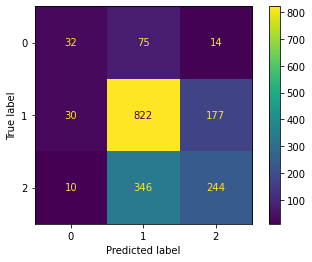

In [8]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [9]:
print(classification_report(y_preds_k, y_test))

              precision    recall  f1-score   support

           0       0.26      0.44      0.33        72
           1       0.80      0.66      0.72      1243
           2       0.41      0.56      0.47       435

    accuracy                           0.63      1750
   macro avg       0.49      0.56      0.51      1750
weighted avg       0.68      0.63      0.64      1750



In [10]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

y_preds_rfc = rfc.predict(X_test_vect)

In [11]:
print(classification_report(y_preds_rfc, y_test))

              precision    recall  f1-score   support

           0       0.25      0.83      0.38        36
           1       0.87      0.70      0.78      1281
           2       0.48      0.67      0.56       433

    accuracy                           0.70      1750
   macro avg       0.53      0.74      0.57      1750
weighted avg       0.76      0.70      0.72      1750



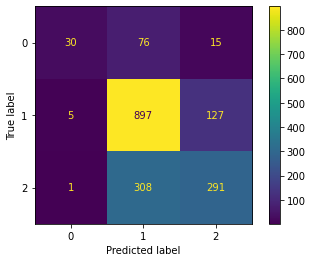

In [12]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [13]:
rfc_grid = {'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(3, 15, 4),
    'criterion': ['gini', 'entropy']
}

In [14]:
rfc_cv = GridSearchCV(estimator = rfc, param_grid = rfc_grid, cv = 5)

In [15]:
#rfc_cv.fit(X_train_vect, y_train)

In [16]:
#best_rfc = rfc_cv.best_estimator_

In [17]:
#rfc_cv.best_params_

In [18]:
#print(classification_report(best_rfc.predict(X_test_vect), y_test))

In [19]:
#plot_confusion_matrix(best_rfc, X_test_vect, y_test)

In [20]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.692


In [21]:
print(classification_report(svcl.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.17      0.91      0.29        23
           1       0.89      0.69      0.78      1320
           2       0.46      0.68      0.55       407

    accuracy                           0.69      1750
   macro avg       0.51      0.76      0.54      1750
weighted avg       0.78      0.69      0.72      1750



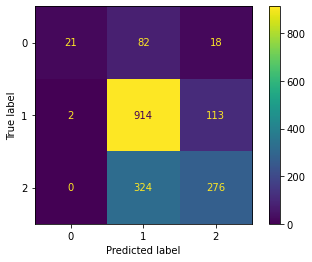

In [22]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [24]:
params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
clf_sv = GridSearchCV(svcl, params)
clf_sv.fit(X_train_vect, y_train)


In [26]:
best_sv = clf_sv.best_estimator_

In [27]:
print(classification_report(best_sv.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.17      0.91      0.29        23
           1       0.89      0.69      0.78      1320
           2       0.46      0.68      0.55       407

    accuracy                           0.69      1750
   macro avg       0.51      0.76      0.54      1750
weighted avg       0.78      0.69      0.72      1750



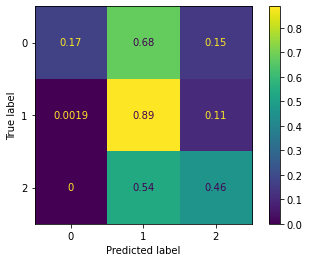

In [30]:
plot_confusion_matrix(best_sv, X_test_vect, y_test, normalize = 'true')

In [34]:
mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)

y_preds_mnb = mnb.predict(X_test_vect)


In [35]:
print(classification_report(mnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.02      1.00      0.05         3
           1       0.94      0.66      0.77      1468
           2       0.33      0.70      0.44       279

    accuracy                           0.66      1750
   macro avg       0.43      0.79      0.42      1750
weighted avg       0.84      0.66      0.72      1750



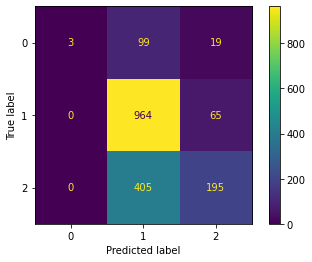

In [38]:
plot_confusion_matrix(mnb, X_test_vect, y_test)

In [39]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [40]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.37      0.33      0.35       136
           1       0.72      0.71      0.71      1041
           2       0.54      0.56      0.55       573

    accuracy                           0.63      1750
   macro avg       0.54      0.53      0.54      1750
weighted avg       0.63      0.63      0.63      1750



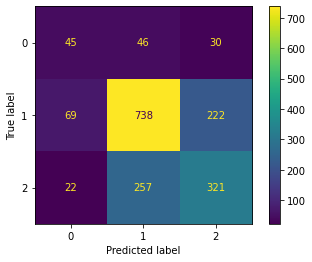

In [42]:
plot_confusion_matrix(cnb, X_test_vect, y_test)